In [1]:
import pandas as pd
df = pd.read_csv('data/Pokemon.csv')
# prepare data
types = df['Type 1'].isin(['Grass', 'Fire', 'Water'])
drop_cols = ['Type 1', 'Type 2', 'Generation', 'Legendary', '#']
df = df[types].drop(columns = drop_cols)
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,VenusaurMega Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65


In [2]:
from sklearn.cluster import KMeans
import numpy as np
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

/home/nhien/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/home/nhien/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'Defense')

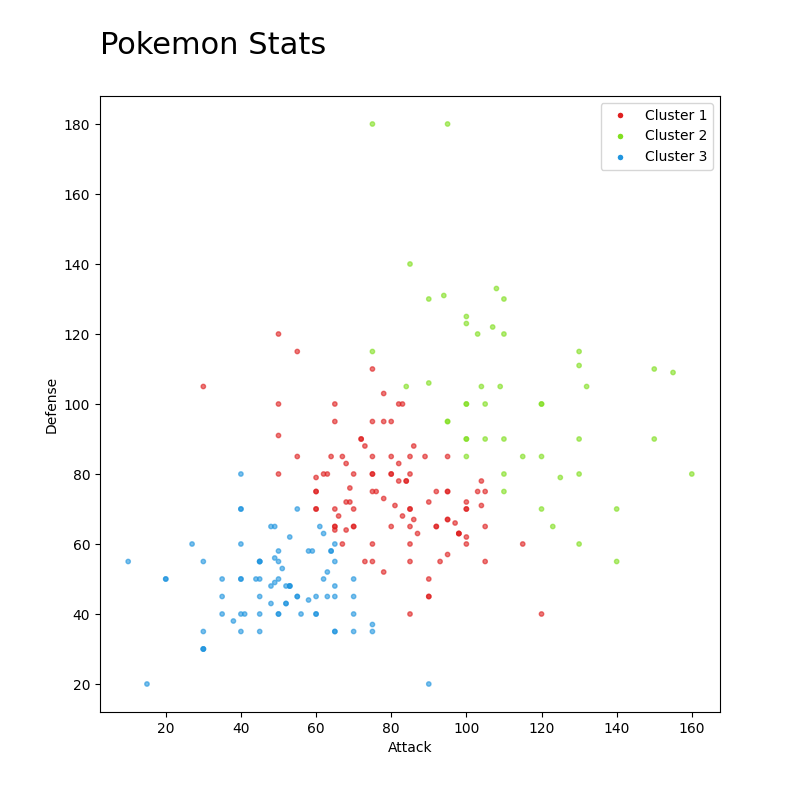

In [6]:
import matplotlib.pyplot as plt

# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
#####PLOT#####
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
# create a list of legend elemntes
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')
# title and labels
plt.title('Pokemon Stats\n', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')


Text(0, 0.5, 'Defense')

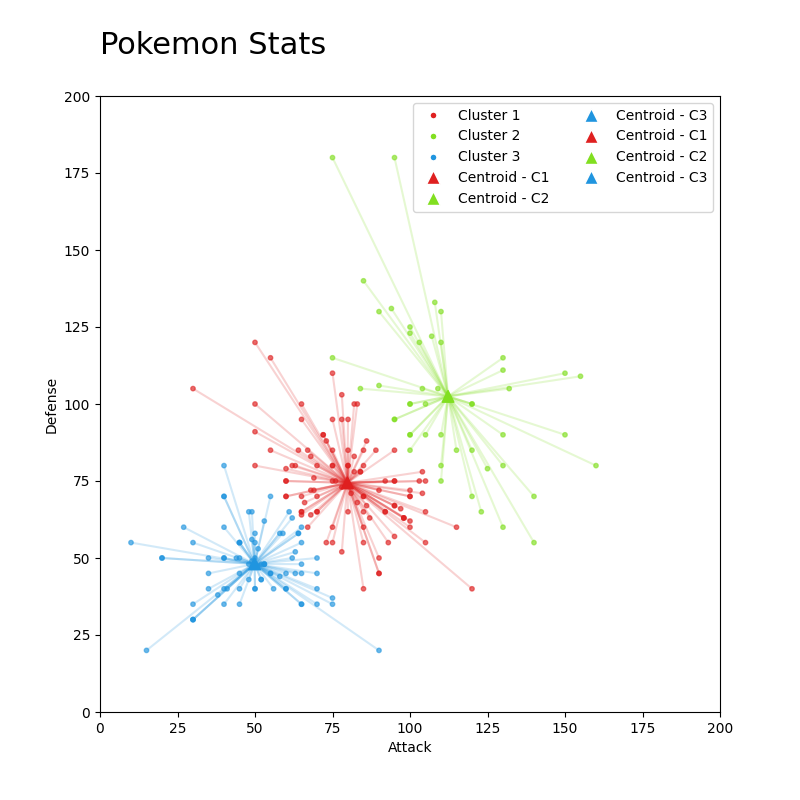

In [10]:
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# plot lines
for idx, val in df.iterrows():
    x = [val.Attack, val.cen_x,]
    y = [val.Defense, val.cen_y]
    plt.plot(x, y, c=val.c, alpha=0.2)
# legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
                   markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
legend_elements.extend([Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)])
legend_elements.extend(cent_leg)
plt.legend(handles=legend_elements, loc='upper right', ncol=2)
# x and y limits
plt.xlim(0,200)
plt.ylim(0,200)
# title and labels
plt.title('Pokemon Stats\n', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')

(0.0, 200.0)

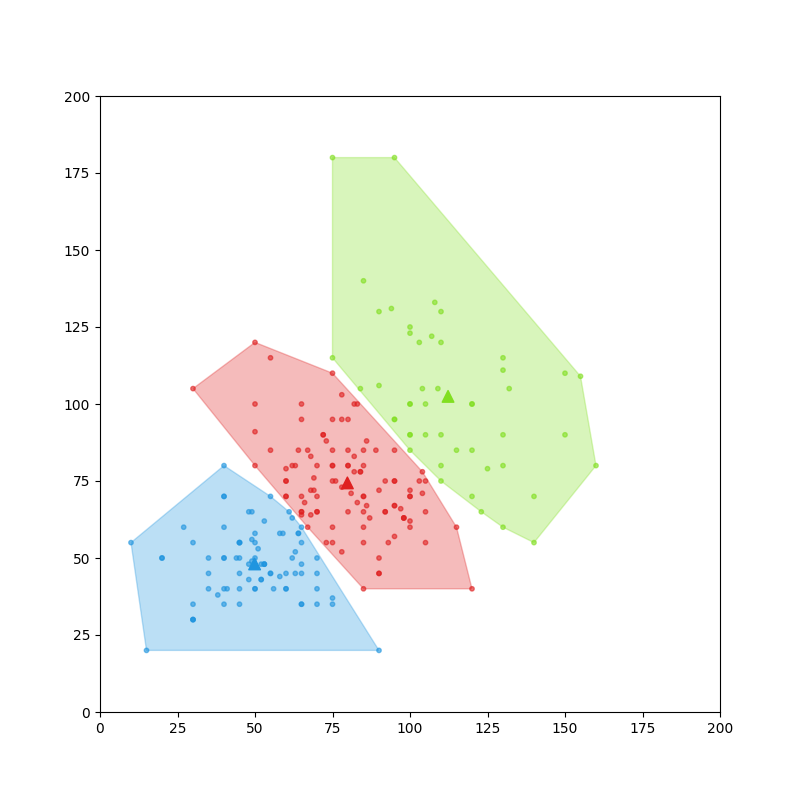

In [11]:
from scipy.spatial import ConvexHull
import numpy as np
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
# plot centers
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# draw enclosure
for i in df.cluster.unique():
    points = df[df.cluster == i][['Attack', 'Defense']].values
    # get convex hull
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    # plot shape
    plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])
    
plt.xlim(0,200)
plt.ylim(0,200)

In [15]:
df[df.cluster == i][['Attack', 'Defense']].values

array([[100, 123],
       [130, 111],
       [103, 120],
       [110,  80],
       [ 95,  95],
       [ 75, 180],
       [ 95, 180],
       [105,  90],
       [130, 115],
       [125,  79],
       [155, 109],
       [130,  60],
       [100,  90],
       [105, 100],
       [ 95,  95],
       [115,  85],
       [ 75, 115],
       [130,  90],
       [110,  75],
       [120,  70],
       [160,  80],
       [110,  90],
       [150, 110],
       [130,  80],
       [140,  70],
       [120, 100],
       [ 85, 140],
       [120,  85],
       [104, 105],
       [ 84, 105],
       [ 90, 130],
       [100,  90],
       [150,  90],
       [109, 105],
       [132, 105],
       [100, 125],
       [110, 130],
       [120, 100],
       [ 90, 106],
       [100, 100],
       [100, 100],
       [123,  65],
       [100,  85],
       [140,  55],
       [108, 133],
       [ 94, 131],
       [107, 122],
       [110, 120]])